In [42]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from xgboost import XGBRegressor

In [4]:
house_price_dataset = sklearn.datasets.load_boston()

In [5]:
house_price_df = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset['feature_names'])

In [6]:
house_price_df['price']=house_price_dataset.target
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


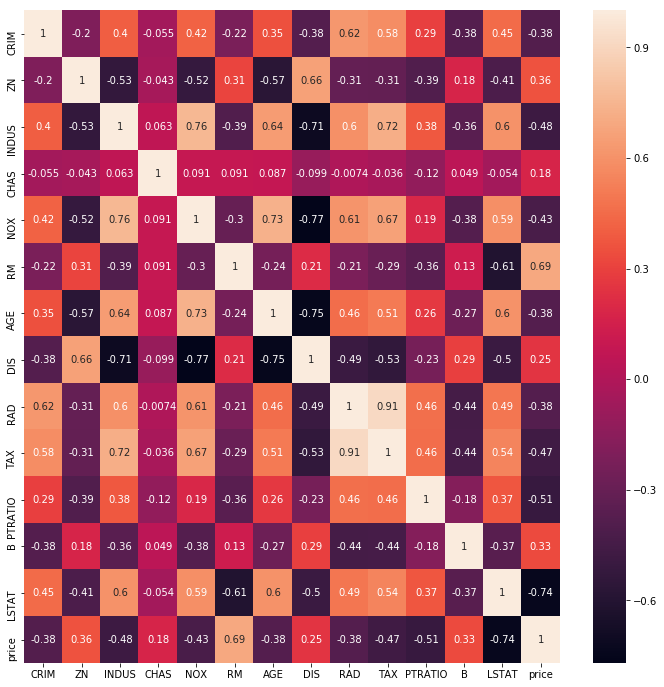

In [35]:
correlation = house_price_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar = True, annot= True)

In [36]:
X,y = house_price_df.drop(['price'],axis=1),house_price_df['price']

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [47]:
model = XGBRegressor().fit(X_train,Y_train)

In [48]:
pred = model.predict(X_test)
score = sklearn.metrics.r2_score(Y_test,pred)
score2 = sklearn.metrics.mean_absolute_error(Y_test,pred)
print(score,score2)


0.8661412289421984 2.2182521118837246


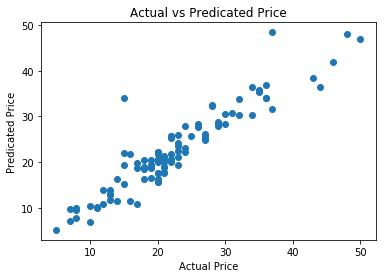

In [50]:
plt.scatter(Y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual vs Predicated Price")
plt.show()
